In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
import PlaceCellAnalysis as pc

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [14]:
# load session
mouse = '4139261.2'
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('Reversal_noTimeout') | df_mouse['Track'].str.match('Reversal')]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat
1151,4139261.2,22_01_2019,2,Reversal_noTimeout,60,1,CA1,2019-01-22,G:\My Drive\\VR_Data\TwoTower\4139261.2\22_01_...,None,G:\My Drive\2P_Data\TwoTower\4139261.2\22_01_2...
1153,4139261.2,22_01_2019,4,Reversal_noTimeout,60,1,CA1,2019-01-22,G:\My Drive\\VR_Data\TwoTower\4139261.2\22_01_...,None,G:\My Drive\2P_Data\TwoTower\4139261.2\22_01_2...
1187,4139261.2,24_01_2019,3,Reversal_noTimeout,78,1,CA1,2019-01-24,G:\My Drive\\VR_Data\TwoTower\4139261.2\24_01_...,None,G:\My Drive\2P_Data\TwoTower\4139261.2\24_01_2...
1215,4139261.2,26_01_2019,3,Reversal,55,1,CA1,2019-01-26,G:\My Drive\\VR_Data\TwoTower\4139261.2\26_01_...,None,G:\My Drive\2P_Data\TwoTower\4139261.2\26_01_2...


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:257: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:256: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])


((<Figure size 360x360 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x24e86526e48>),
 (<Figure size 360x360 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x24e86428f28>),
 (<Figure size 360x360 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x24e8650aa20>))

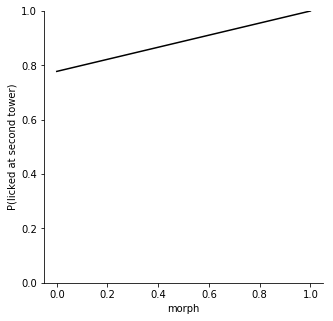

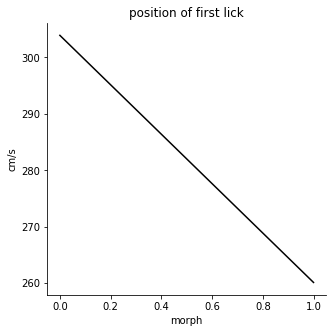

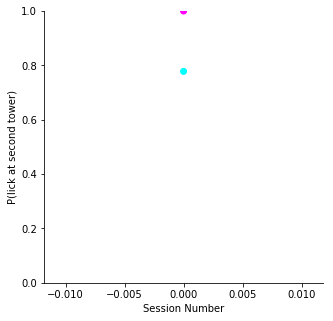

In [15]:
data = pp.behavior_dataframe([df_mouse['data file'].iloc[i] for i in range(3,df_mouse.shape[0],1)],concat=False)
b.learning_curve_plots(data)

In [ ]:
s2pdir = "G:\My Drive\2P_Data\TwoTower\4139251.1\23_01_2019\Reversal\suite2p\plane0"
F = 